# CLASSIFICATION

### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the data

In [2]:
data = pd.read_csv('Sample/data.csv')
columns = data.columns
for i in columns:
    if(i == "Unnamed: 0"):
        data = data.drop(i, axis =1)

In [3]:
data

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
0,2016,3,8,27,2016-08-27,11292,DEN,12889,LAS,600,...,47,0.0,1012,8,10,113,78,77,30,49
1,2016,3,8,27,2016-08-27,12892,LAX,12889,LAS,620,...,47,0.0,1012,8,10,113,78,77,30,49
2,2016,3,8,27,2016-08-27,12889,LAS,13204,MCO,736,...,60,0.7,1016,23,10,386,84,85,84,53
3,2016,3,8,27,2016-08-27,10397,ATL,13204,MCO,1350,...,60,0.7,1016,23,10,386,84,85,84,53
4,2016,3,8,27,2016-08-27,11298,DFW,13204,MCO,1120,...,60,0.7,1016,23,10,386,84,85,84,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2016,2,5,11,2016-05-11,11292,DEN,11057,CLT,2345,...,2,0.0,1018,18,10,113,69,68,192,75
1877292,2016,2,5,11,2016-05-11,11292,DEN,10397,ATL,2359,...,0,0.0,1019,14,10,113,69,69,219,84
1877293,2016,2,5,11,2016-05-11,12889,LAS,13303,MIA,2300,...,4,0.0,1020,19,10,113,75,75,124,82
1877294,2016,2,5,12,2016-05-12,12889,LAS,10397,ATL,2130,...,1,0.0,1019,6,10,113,68,70,236,71


In [4]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'FlightDate',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMinutes', 'ArrDel15', 'CRSArrTime_round', 'CarrierDelay',
       'windspeedKmph', 'DewPointF', 'cloudcover', 'precipMM', 'pressure',
       'WindGustKmph', 'visibility', 'weatherCode', 'tempF', 'WindChillF',
       'winddirDegree', 'humidity'],
      dtype='object')

## FEATURE SELECTION

### Visualising the correlations

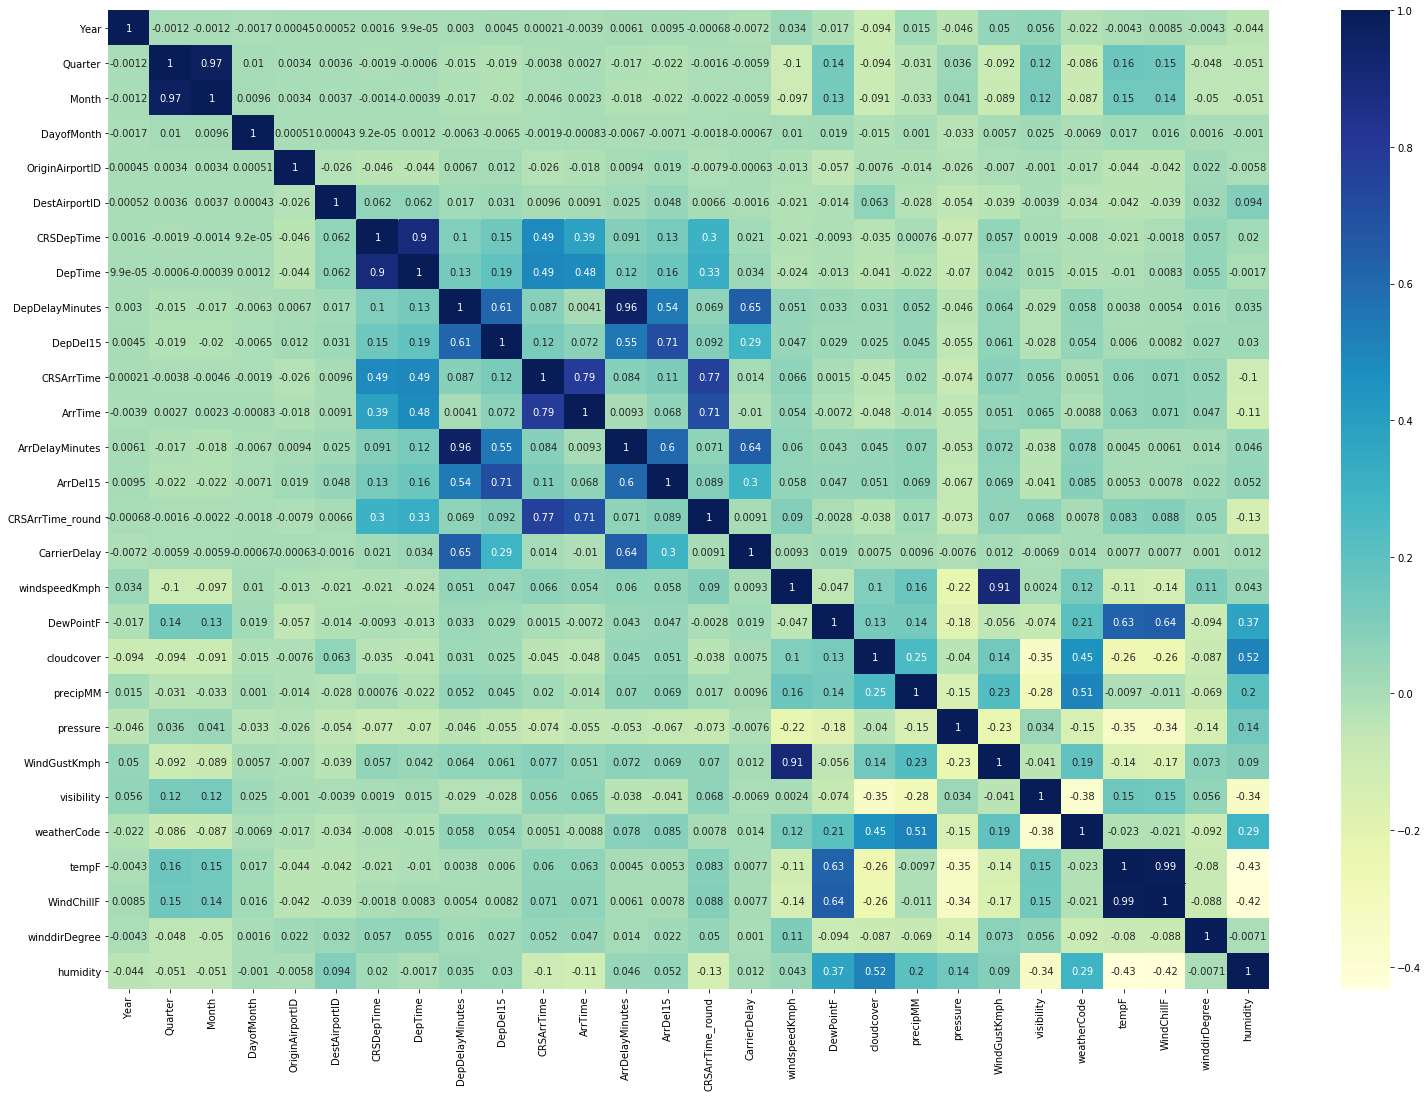

In [5]:
plt.figure(figsize=(26, 18))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [6]:
new_data = data[['Year', 'Quarter', 'Month', 'DayofMonth','Origin', 'OriginAirportID', 'Dest', 'DestAirportID', 'CRSDepTime','DepTime', 'DepDelayMinutes','DepDel15', 'CRSArrTime','CarrierDelay', 'windspeedKmph', 'DewPointF', 'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility', 'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity', 'ArrDel15']]
cols = new_data.columns

Y = new_data['ArrDel15']
X = new_data.loc[:, new_data.columns != 'ArrDel15']

In [7]:
len(X.columns)

26

### Label encoding

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in X.columns:
    if X[column_name].dtype == object:
        X[column_name] = le.fit_transform(X[column_name])
    else:
        pass

/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## TRAIN & TEST SPLIT

In [9]:
from sklearn.model_selection import train_test_split
x = new_data.loc[:, new_data.columns != 'ArrDel15']
y = new_data['ArrDel15']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 1)

#to avoid float conversion errors while fitting the data into the model
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name_train in x_train.columns:
    if x_train[column_name_train].dtype == object:
        x_train[column_name_train] = le.fit_transform(x_train[column_name_train])
    else:
        pass
    
for column_name_test in x_test.columns:
    if x_test[column_name_test].dtype == object:
        x_test[column_name_test] = le.fit_transform(x_test[column_name_test])
    else:
        pass

/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## LOGISTIC REGRESSION

/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    297842
         1.0       0.90      0.69      0.78     77618

    accuracy                           0.92    375460
   macro avg       0.91      0.84      0.87    375460
weighted avg       0.92      0.92      0.92    375460



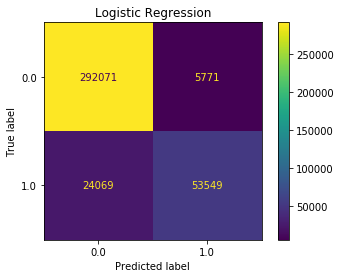

In [10]:
from sklearn import linear_model

#building a classifier
clf = linear_model.LogisticRegression()
clf.fit(x_train, y_train)

#predicting the test samples
y_pred_log = clf.predict(x_test)

#testing accuracy
from sklearn import metrics
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred_log))
metrics.plot_confusion_matrix(clf, x_test, y_test)
plt.title('Logistic Regression')
plt.show()


## DECISION TREE CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94    297842
         1.0       0.77      0.79      0.78     77618

    accuracy                           0.91    375460
   macro avg       0.86      0.87      0.86    375460
weighted avg       0.91      0.91      0.91    375460



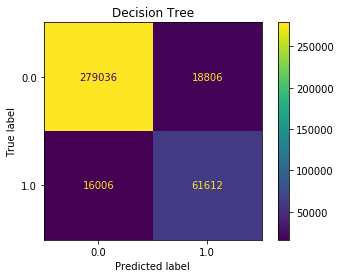

In [11]:
from sklearn.tree import DecisionTreeClassifier
    
#building a classifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(x_train, y_train)

#predicting the test samples
y_pred_tree = clf_tree.predict(x_test)

#testing the accuracy
from sklearn import metrics
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred_tree))
metrics.plot_confusion_matrix(clf_tree, x_test, y_test)
plt.title('Decision Tree')
plt.show()

## RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96    297842
         1.0       0.94      0.77      0.85     77618

    accuracy                           0.94    375460
   macro avg       0.94      0.88      0.91    375460
weighted avg       0.94      0.94      0.94    375460



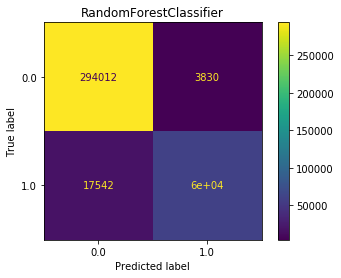

In [12]:
from sklearn.ensemble import RandomForestClassifier

# train model
clf_rfc = RandomForestClassifier(n_estimators=10)
clf_rfc.fit(x_train, y_train)

# predict on test set
y_pred_rfc = clf_rfc.predict(x_test)

#testing the accuracy
from sklearn import metrics
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred_rfc))
metrics.plot_confusion_matrix(clf_rfc, x_test, y_test)
plt.title('RandomForestClassifier')
plt.show()

## EXTRA TREES CLASSIFIER

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    297842
         1.0       0.89      0.80      0.85     77618

    accuracy                           0.94    375460
   macro avg       0.92      0.89      0.90    375460
weighted avg       0.94      0.94      0.94    375460



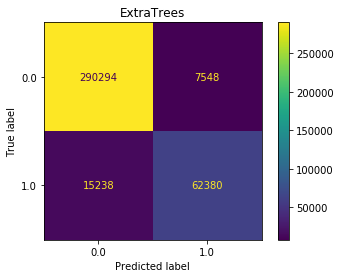

In [13]:
from sklearn.ensemble import ExtraTreesClassifier

#building a classifier
clf_extratree = ExtraTreesClassifier()
clf_extratree.fit(x_train, y_train)

#predicting the test samples
y_pred_extratree = clf_extratree.predict(x_test)

#testing the accuracy
from sklearn import metrics
from sklearn.metrics import classification_report as cr
print(cr(y_test, y_pred_extratree))
metrics.plot_confusion_matrix(clf_extratree, x_test, y_test)
plt.title('ExtraTrees')
plt.show()

## XGBOOST

In [14]:
import xgboost as xgb

#transforming the data to 'DMatrix' for xgboost to handle data
D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test, label=y_test)

#defining parameters for gradient boosting ensemble
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20#The number of training iterations

#training the classifier model
clf_xgb = xgb.train(param, D_train, steps)

#making predictions
y_pred_xgb = clf_xgb.predict(D_test)
best_pred_xgb = np.asarray([np.argmax(line) for line in y_pred_xgb])

#testing accuracy
from sklearn.metrics import classification_report as cr
print(cr(y_test, best_pred_xgb))

[21:59:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:59:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:59:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:59:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:59:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:59:48] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[21:59:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:59:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[21:59:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_dep

## CLASS IMBALANCE

### Checking for class imbalance

Class 0: 1191396
Class 1: 310440
Proportion: 3.84 : 1


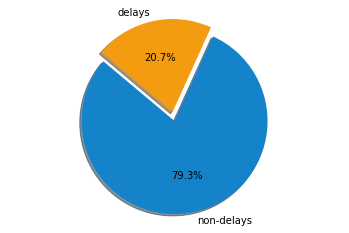

In [15]:
counts = y_train.value_counts()
labels = ['non-delays', 'delays']
explode = (0.1, 0)
colors = ['#1483C9', '#F39C12']
print('Class 0:', counts[0])
print('Class 1:', counts[1])
print('Proportion:', round(counts[0] / counts[1], 2), ': 1')

plt.pie(counts, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### Metrics

#### Precision - Recall curve (PR curve)

In [16]:
from sklearn.metrics import precision_recall_curve as pr
from sklearn.metrics import auc

#### Logistic Regression

No handles with labels found to put in legend.


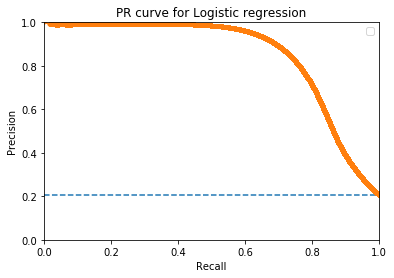

AUC score - 0.85212022205894


In [17]:
probs = clf.predict_proba(x_test)
preds = probs[:,1]
precision, recall, _ = pr(y_test, preds)
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
auc_score = auc(recall, precision)

plt.title('PR curve for Logistic regression')
plt.plot(recall, precision, marker='.')
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("AUC score -", auc_score)

#### DecisionTree Classifier

No handles with labels found to put in legend.


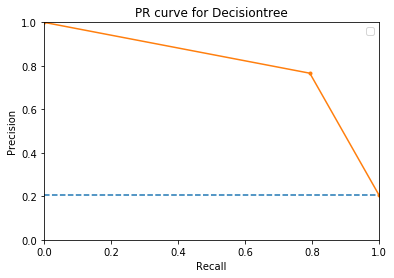

AUC score - 0.8012811013690233


In [18]:
probs = clf_tree.predict_proba(x_test)
preds = probs[:,1]
precision, recall, _ = pr(y_test, preds)
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
auc_score = auc(recall, precision)

plt.title('PR curve for Decisiontree')
plt.plot(recall, precision, marker='.')
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("AUC score -", auc_score)

#### ExtraTrees Classifier

No handles with labels found to put in legend.


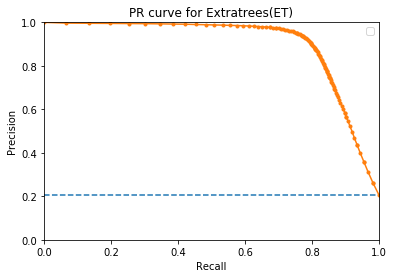

AUC score - 0.9


In [19]:
probs = clf_extratree.predict_proba(x_test)
preds = probs[:,1]
precision, recall, _ = pr(y_test, preds)
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
auc_score = auc(recall, precision)

print('\n')
plt.title('PR curve for Extratrees(ET)')
plt.plot(recall, precision, marker='.')
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("AUC score -", round(auc_score, 2))

#### RandomForests Classifier

No handles with labels found to put in legend.


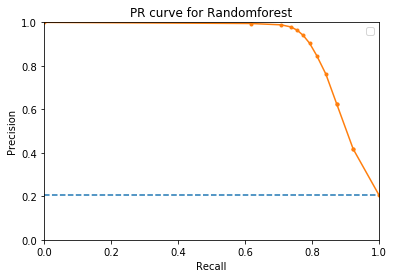

AUC score - 0.9000046380303858


In [20]:
probs = clf_rfc.predict_proba(x_test)
preds = probs[:,1]
precision, recall, _ = pr(y_test, preds)
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
auc_score = auc(recall, precision)

plt.title('PR curve for Randomforest')
plt.plot(recall, precision, marker='.')
plt.legend(loc = 'upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()
print("AUC score -", auc_score)

### Resampling

#### UNDER SAMPLING TECHNIQUES

#### Random under-sampling

Random under-sampling:
1.0    310440
0.0    310440
Name: ArrDel15, dtype: int64


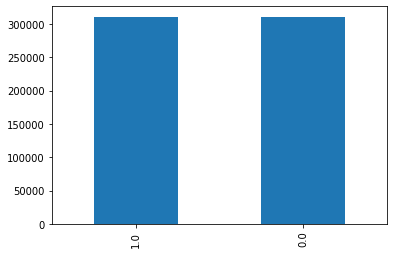

In [21]:
#importing the undersampler
from imblearn.under_sampling import RandomUnderSampler
#undersampling the train dataset
undersample = RandomUnderSampler(sampling_strategy='majority')
xtrain_under, ytrain_under = undersample.fit_resample(x_train, y_train)
#visualising the imbalanced classes transform to balanced one
print('Random under-sampling:')
print(ytrain_under.value_counts())
ytrain_under.value_counts().plot(kind='bar')
plt.show()

In [22]:
#Logistic Regression
clf.fit(xtrain_under, ytrain_under)
y_pred_log_under = clf.predict(x_test)
print('Logistic Regression\r')
print(cr(y_test, y_pred_log_under), '\n')

#Decison Tree 
clf_tree.fit(xtrain_under, ytrain_under)
y_pred_tree_under = clf_tree.predict(x_test)
print('DecisionTree\r')
print(cr(y_test, y_pred_tree_under), '\n')

#ExtraTrees
clf_extratree.fit(xtrain_under, ytrain_under)
y_pred_extratree_under = clf_extratree.predict(x_test)
print('ExtraTrees\r')
print(cr(y_test, y_pred_extratree_under), '\n')


#RandomForest
clf_rfc.fit(xtrain_under, ytrain_under)
y_pred_rfc_under = clf_rfc.predict(x_test)
print('RandomForest\r')
print(cr(y_test, y_pred_rfc_under), '\n')

#xgboost
D_train_under = xgb.DMatrix(xtrain_under, label=ytrain_under)
D_test_under = xgb.DMatrix(x_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20

clf_xgb_under = xgb.train(param, D_train_under, steps)

y_pred_xgb_under = clf_xgb_under.predict(D_test_under)
best_pred_xgb_under = np.asarray([np.argmax(line) for line in y_pred_xgb_under])

#testing accuracy
print('\n')
from sklearn.metrics import classification_report as cr
print(cr(y_test, best_pred_xgb_under))


/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    297842
         1.0       0.75      0.79      0.77     77618

    accuracy                           0.90    375460
   macro avg       0.85      0.86      0.85    375460
weighted avg       0.90      0.90      0.90    375460
 

DecisionTree
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89    297842
         1.0       0.57      0.85      0.68     77618

    accuracy                           0.84    375460
   macro avg       0.76      0.84      0.79    375460
weighted avg       0.88      0.84      0.85    375460
 

ExtraTrees
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94    297842
         1.0       0.72      0.86      0.79     77618

    accuracy                           0.90    375460
   macro avg       0.84      0.89      0.86    375460
weighted avg       0.91   

#### OVER SAMPLING TECHNIQUES

#### Random over-sampling

Random over-sampling:
1.0    1191396
0.0    1191396
Name: ArrDel15, dtype: int64


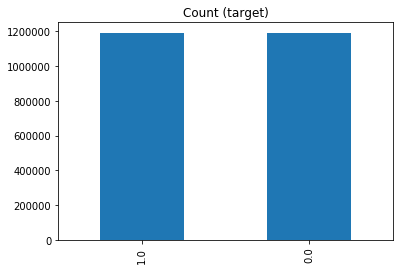

In [23]:
#importing the oversampler
from imblearn.over_sampling import RandomOverSampler
#building a undersample model
oversample = RandomOverSampler(sampling_strategy='minority')
xtrain_over, ytrain_over = oversample.fit_resample(x_train, y_train)
#visualising the imbalanced classes transform to balanced one
print('Random over-sampling:')
print(ytrain_over.value_counts())
ytrain_over.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [24]:
#Logistic Regression
clf.fit(xtrain_over, ytrain_over)
y_pred_log_over = clf.predict(x_test)
print('Logistic Regression\r')
print(cr(y_test, y_pred_log_over), '\n')


#Decison Tree 
clf_tree.fit(xtrain_over, ytrain_over)
y_pred_tree_over = clf_tree.predict(x_test)
print('DecisionTree\r')
print(cr(y_test, y_pred_tree_over), '\n')


#ExtraTrees
clf_extratree.fit(xtrain_over, ytrain_over)
y_pred_extratree_over = clf_extratree.predict(x_test)
print('Extratree\r')
print(cr(y_test, y_pred_extratree_over), '\n')


#RandomForest
clf_rfc.fit(xtrain_over, ytrain_over)
y_pred_rfc_over = clf_rfc.predict(x_test)
print('RandomForest\r')
print(cr(y_test, y_pred_rfc_over), '\n')

#xgboost
D_train_over = xgb.DMatrix(xtrain_over, label=ytrain_over)
D_test_over = xgb.DMatrix(x_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20

clf_xgb_over = xgb.train(param, D_train_over, steps)

y_pred_xgb_over = clf_xgb_over.predict(D_test_over)
best_pred_xgb_over = np.asarray([np.argmax(line) for line in y_pred_xgb_over])

#testing accuracy
from sklearn.metrics import classification_report as cr
print(cr(y_test, best_pred_xgb_over))



/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    297842
         1.0       0.75      0.79      0.77     77618

    accuracy                           0.90    375460
   macro avg       0.85      0.86      0.85    375460
weighted avg       0.90      0.90      0.90    375460
 

DecisionTree
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94    297842
         1.0       0.78      0.79      0.78     77618

    accuracy                           0.91    375460
   macro avg       0.86      0.87      0.86    375460
weighted avg       0.91      0.91      0.91    375460
 

Extratree
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96    297842
         1.0       0.89      0.80      0.84     77618

    accuracy                           0.94    375460
   macro avg       0.92      0.89      0.90    375460
weighted avg       0.94    

#### SMOTE

SMOTE
1.0    1191396
0.0    1191396
Name: ArrDel15, dtype: int64


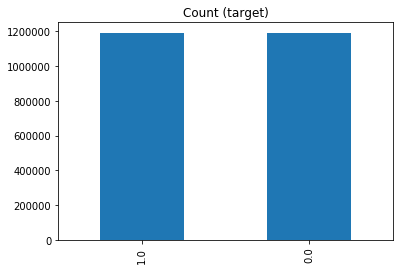

In [26]:
from imblearn.over_sampling import SMOTE

smk = SMOTE(random_state=1)

xtrain_smt,ytrain_smt = smk.fit_sample(x_train,y_train)

#visualising the imbalanced data tranform into balanced one after the resampling technique
print('SMOTE')
print(ytrain_smt.value_counts())
ytrain_smt.value_counts().plot(kind='bar', title='Count (target)')
plt.show()

In [27]:
#Logistic Regression
clf.fit(xtrain_smt, ytrain_smt)
y_pred_log_smt = clf.predict(x_test)
print('Logistic Regression\r')
print(cr(y_test, y_pred_log_smt), '\n')

#Decison Tree 
clf_tree.fit(xtrain_smt, ytrain_smt)
y_pred_tree_smt = clf_tree.predict(x_test)
print('DecisionTree\r')
print(cr(y_test, y_pred_tree_smt), '\n')


#ExtraTrees
clf_extratree.fit(xtrain_smt, ytrain_smt)
y_pred_extratree_smt = clf_extratree.predict(x_test)
print('ExtraTree\r')
print(cr(y_test, y_pred_extratree_smt), '\n')

#RandomForest
clf_rfc.fit(xtrain_smt, ytrain_smt)
y_pred_rfc_smt = clf_rfc.predict(x_test)
print('RandomForest\r')
print(cr(y_test, y_pred_rfc_smt), '\n')

#xgboost
D_train_smt = xgb.DMatrix(xtrain_smt, label=ytrain_smt)
D_test_smt = xgb.DMatrix(x_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20

clf_xgb_smt = xgb.train(param, D_train_smt, steps)

y_pred_xgb_smt = clf_xgb_smt.predict(D_test_smt)
best_pred_xgb_smt = np.asarray([np.argmax(line) for line in y_pred_xgb_smt])

#testing accuracy
print('\n')
from sklearn.metrics import classification_report as cr
print(cr(y_test, best_pred_xgb_smt))

/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    297842
         1.0       0.75      0.79      0.77     77618

    accuracy                           0.90    375460
   macro avg       0.85      0.86      0.85    375460
weighted avg       0.90      0.90      0.90    375460
 

DecisionTree
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    297842
         1.0       0.75      0.79      0.77     77618

    accuracy                           0.90    375460
   macro avg       0.85      0.86      0.85    375460
weighted avg       0.91      0.90      0.90    375460
 

ExtraTree
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96    297842
         1.0       0.84      0.82      0.83     77618

    accuracy                           0.93    375460
   macro avg       0.89      0.89      0.89    375460
weighted avg       0.93    

# DONE